# baby names

A list of baby names over the year is given. Here's a few challenges. 
1. Merge all names in one piece. 
2. Groupby sex, and plot the total over year.
3. Add a proportion column to the dataset
4. Find the 1000 most popular names for each year and sex
5. The trend of name John and Mary over years(the count change)
6. Find name diversity

## Combine the tables 

In [213]:
%matplotlib inline
import pandas as pd 
import os 
import re
pieces = []

for file_ in os.listdir('./names'):
    if file_.endswith('txt'):
        file = pd.read_csv(os.path.join('./names', file_), 
                           header=None,
                           names=['name', 'sex', 'births'])
        [year_] = re.findall('\d{4}', file_ )
        file['year'] = int(year_)
    pieces.append(file)
    
names_table = pd.concat(pieces, axis=0, ignore_index=True)

In [214]:
len(os.listdir('./names'))

139

## plot the time series by gender

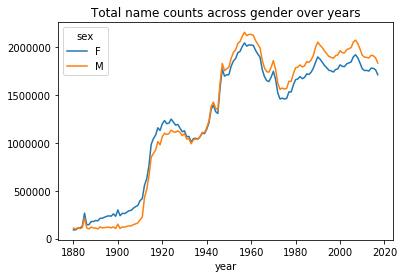

In [215]:
by_gender = names_table.groupby(['year', 'sex'])['births'].sum().unstack()
by_gender.plot.line(title='Total name counts across gender over years')

In [50]:
#alternatively, one can use pivot_table
pivot_table = names_table.pivot_table('births', columns='sex', index='year')
pivot_table.head()

sex,F,M
year,,
1880,96.595541,104.433837
1881,98.030917,101.046138
1882,104.909533,103.444950
1883,106.564516,101.579612
1884,110.085324,101.726222


## Add proportion

I am actually surprised to see that the result does not use year and sex as part of the index. My theory is we are performing in place operation and did not mess with index at all If the customized funtion is going to generate a new df (like .describe would do), then the new multi-index is supposed to show up.

In [458]:
def add_proportion(df, var_):
    df['proportion'] = df[var_]/df[var_].sum()
    return df 

name_table_with_prop = names_table.groupby(['year', 'sex']).apply(add_proportion, var_='births')
name_table_with_prop.head()

,name,sex,births,year,last_letter,proportion
0,Emily,F,25953,2000,y,0.014298
1,Hannah,F,23080,2000,h,0.012715
2,Madison,F,19967,2000,n,0.011000
3,Ashley,F,17997,2000,y,0.009915
4,Sarah,F,17697,2000,h,0.009750


## find the top 1000 names for each year and each gender

In [162]:
def sort_top_1000(df, col):
    df = df.sort_values(col, ascending=False)[0:1000]
    return df
selected_births = name_table_with_prop.groupby(['year', 'sex']).\
                  apply(sort_top_1000, col='births')
top_1000_names = selected_births.reset_index(drop=True)

## find trends for a certain name over time


array([<matplotlib.axes._subplots.AxesSubplot object at 0x17cace160>,
      dtype=object)

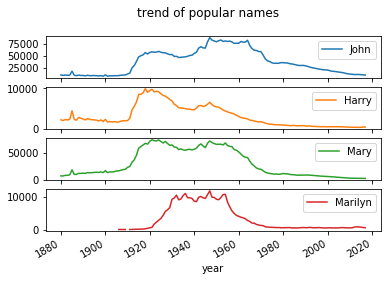

In [190]:
year_and_name = top_1000_names.pivot_table('births', columns='name', index='year', aggfunc=sum)
popular_names = ['John', 'Harry', 'Mary', 'Marilyn']
year_and_name[popular_names].plot(subplots=True, grid=False, title='trend of popular names')

## analyze the diversity

find how many unique names do we have until we cover 50% of all individuals.

In [252]:
def find_cumsum_50(df, variable):
    cumsum_list = df.sort_values(ascending=False, by=variable)[variable].cumsum()
    [mid_point] = cumsum_list.searchsorted(0.50)
    return mid_point + 1

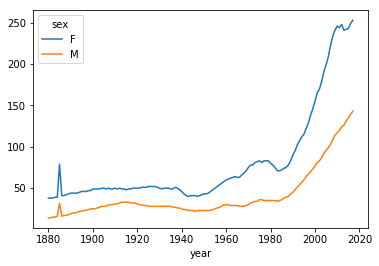

In [253]:
cumsum_50 = name_table_with_prop.groupby(['year', 'sex']).\
            apply(find_cumsum_50, variable='proportion').\
            unstack()
cumsum_50.plot.line(subplots=False)

Another way to look at this is simply find how much the top 1000 names account for in the general population.

Text(0.5, 1.0, 'sum of top 1000 names proportions')

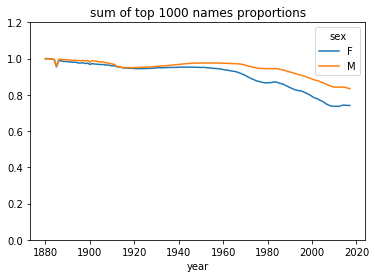

In [268]:
import matplotlib.pyplot as plt
fig, subplot = plt.subplots(1)
trend_line = top_1000_names.groupby(['sex', 'year']).sum()['proportion'].unstack(0)
trend_line.plot.line(subplots=False, ax=subplot)
subplot.set_ylim([0, 1.2])
subplot.set_title('sum of top 1000 names proportions')

In [275]:
names_table['last_letter'] = names_table.name.map(lambda x: x[-1])

In [283]:
names_table.head()

,name,sex,births,year,last_letter
0,Emily,F,25953,2000,y
1,Hannah,F,23080,2000,h
2,Madison,F,19967,2000,n
3,Ashley,F,17997,2000,y
4,Sarah,F,17697,2000,h


In [393]:
agg_letter = names_table.groupby(['sex', 'year','last_letter']).agg({'births': sum})['births'].unstack()
agg_letter_ratios = agg_letter.div(agg_letter.sum(1), axis=0)
agg_letter_ratios.fillna(0,inplace=True)
agg_letter_ratios.head()

last_letter         a    b         c         d         e    f         g  \
sex year                                                                  
F   1880     0.345587  0.0  0.000000  0.006693  0.366841  0.0  0.000077   
    1881     0.343447  0.0  0.000000  0.006601  0.370624  0.0  0.000054   
    1882     0.338776  0.0  0.000046  0.006806  0.374595  0.0  0.000111   
    1883     0.341251  0.0  0.000045  0.007212  0.373160  0.0  0.000071   
    1884     0.338552  0.0  0.000000  0.007100  0.372725  0.0  0.000186   

last_letter         h         i    j    ...       q         r         s  \
sex year                                ...                               
F   1880     0.053444  0.000670  0.0    ...     0.0  0.005286  0.015287   
    1881     0.052016  0.000848  0.0    ...     0.0  0.004535  0.014312   
    1882     0.051610  0.000751  0.0    ...     0.0  0.005471  0.015179   
    1883     0.050757  0.000677  0.0    ...     0.0  0.005698  0.015972   
    1884     0.051170  0.000651  0.0    ...     0.0  0.005565  0.015796   

last_letter         t         u    v         w         x         y         z  
sex year                                                                      
F   1880     0.023650  0.004176  0.0  0.000000  0.000000  0.115031  0.001165  
    1881     0.023545  0.004644  0.0  0.000054  0.000000  0.113145  0.001033  
    1882     0.022244  0.003802  0.0  0.000000  0.000000  0.112595  0.000983  
    1883     0.022739  0.003953  0.0  0.000000  0.000062  0.107399  0.001255  
    1884     0.021888  0.003798  0.0  0.000000  0.000000  0.107875  0.001147  

[5 rows x 26 columns]

In [394]:
data_to_plot = agg_letter_ratios.loc[idx[:, [1910, 1961,2010]], :]

Text(0.5, 1.0, 'female last letter change')

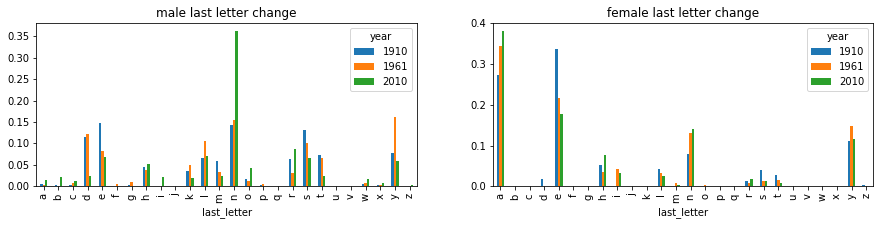

In [406]:
fig, plots = plt.subplots(1,2, figsize=[15,3])
data_to_plot.loc['M'].T.plot.bar(ax=plots[0])
plots[0].set_title('male last letter change')
data_to_plot.loc['F'].T.plot.bar(ax=plots[1])
plots[1].set_title('female last letter change')

Text(0.5, 1.0, 'line plot for males')

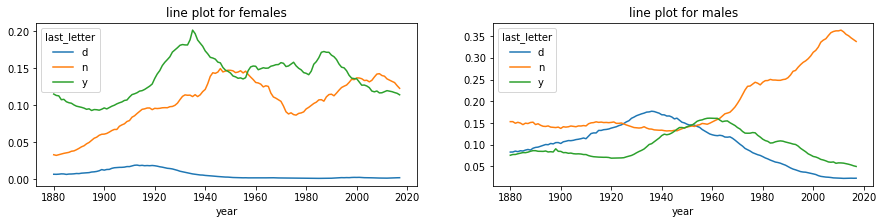

In [405]:
#how the three letters change over time
dny = agg_letter_ratios[['d','n','y']]
fig, line_plot = plt.subplots(1,2, figsize=[15,3])
female_line_plot = dny.loc['F'].plot.line(ax=line_plot[0])
female_line_plot.set_title('line plot for females')
male_line_plot = dny.loc['M'].plot.line(ax=line_plot[1])
male_line_plot.set_title('line plot for males')

## the ratio change of leslie like names

In [456]:
leslie_names = ['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly']
leslie_table = name_table_with_prop[name_table_with_prop.name.isin(leslie_names)]
ts_table = leslie_table.groupby(['sex','year']).sum()

def find_ratio(df):
    df['ratio'] = df.births/df.births.sum()
    return df
ts_table = ts_table.groupby('year').apply(find_ratio)
ts_table.head()

births  proportion     ratio
sex year                              
F   1880       8    0.000088  0.091954
    1881      11    0.000120  0.106796
    1882       9    0.000083  0.065693
    1883       7    0.000062  0.053030
    1884      15    0.000116  0.107143

In [455]:
m = ts_table.loc['M']
f = ts_table.loc['F']
m = m.sort_index()
f = f.sort_index()

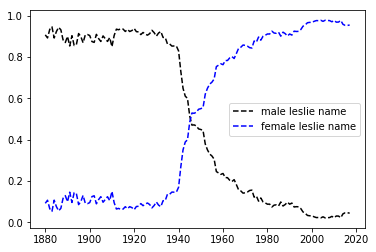

In [454]:
plt.plot(m.ratio, 'k--', label='male leslie name')
plt.plot(f.ratio, 'b--', label='female leslie name')
plt.legend()

A note on matrix division:

If a numpy matrix is involved, only have to make sure the dimension is right, and the division will be implemented no problem. However, if its about a series and a dataframe, we got to make sure the indices matches, otherwise we are giong to end up with a bunch of NAs.


In [486]:
test = pd.DataFrame(np.random.randn(12).reshape(3,4), columns=list('abcd'), index=list('ABC'))
test

,a,b,c,d
A,0.572265,-0.644370,1.067396,-1.425395
B,-0.114643,-1.756538,-1.434030,1.307421
C,0.376529,0.703744,2.456059,-1.308974


In [490]:
test/pd.Series([1,2,3,4]) #never works as long as the indices does not match

,a,b,c,d,0,1,2,3
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [491]:
test.div(pd.Series([1,2,3]), axis=0)

,a,b,c,d
A,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN


In [492]:
test.div(np.array([1,2,3]), axis=0) #this is fine however...

,a,b,c,d
A,0.572265,-0.644370,1.067396,-1.425395
B,-0.057321,-0.878269,-0.717015,0.653710
C,0.125510,0.234581,0.818686,-0.436325
